# Shallow fully connected networks on MNIST using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We will use Tensorflow 2 (TF 2) and the Keras API. If you need to install some packages, use `pip install ...`, e.g. `pip install sklearn` for SciKit Learn.

## Loading the packages

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [38]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


## Loading the raw data
First load the `mnist` dataset and normalize it to be in the range [0, 1]

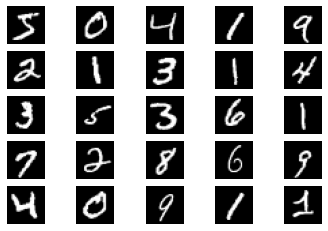

In [4]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    # show the plot
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

show_imgs(X_train)

In [5]:
# MLP: Input data should be 'flattened'. Alternatively we could use a layer for that
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Normalize input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [6]:
n_classes = 10
# Conversion to class vectors
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [8]:
E = 5                # number of epochs
B = 128              # batch size
D = X_train.shape[1] # dimension of input sample - 784 for MNIST

model = keras.models.Sequential()

# one layer network
model.add(keras.layers.Dense(n_classes, input_shape=(D,), activation='softmax'))

# two layers network
#H = 64
#model.add(Dense(H, input_shape=(D,), activation='relu'))
#model.add(Dense(n_classes, input_shape=(D,), activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])
log = model.fit(X_train, 
                Y_train, 
                batch_size=B, 
                epochs=E,
                verbose=1, 
                validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.8512 - val_loss: 0.3399 - val_accuracy: 0.9083
Epoch 2/5
469/469 [==============================] - 0s 984us/step - loss: 0.3296 - accuracy: 0.9092 - val_loss: 0.2985 - val_accuracy: 0.9164
Epoch 3/5
469/469 [==============================] - 0s 1ms/step - loss: 0.3015 - accuracy: 0.9159 - val_loss: 0.2866 - val_accuracy: 0.9195
Epoch 4/5
469/469 [==============================] - 0s 980us/step - loss: 0.2880 - accuracy: 0.9187 - val_loss: 0.2774 - val_accuracy: 0.9226
Epoch 5/5
469/469 [==============================] - 0s 988us/step - loss: 0.2800 - accuracy: 0.9222 - val_loss: 0.2722 - val_accuracy: 0.9254


## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

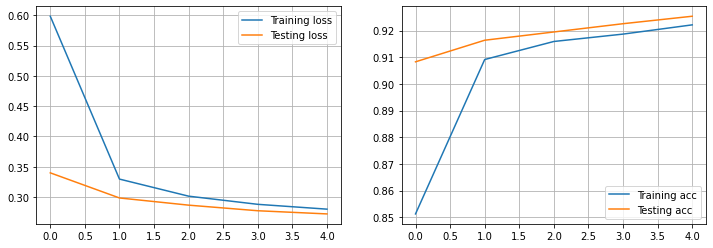

In [10]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [11]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.27218395471572876
Test accuracy: 0.9254000186920166


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [12]:
y_pred = model.predict(X_test, verbose=0)
print(y_pred[0])
y_pred = np.argmax(y_pred, axis=-1)
print(y_pred[0])
cm = confusion_matrix(y_test, y_pred)
print(cm)

[5.5574928e-06 2.1655212e-10 3.6724448e-06 1.5962402e-03 9.4358461e-07
 1.3187262e-05 4.0846479e-11 9.9783677e-01 1.2271979e-05 5.3136307e-04]
7
[[ 964    0    2    1    0    4    6    2    1    0]
 [   0 1112    4    2    1    2    4    2    8    0]
 [   4    5  933   15   11    3   12   10   34    5]
 [   3    0   23  915    1   26    1   11   21    9]
 [   2    1    6    1  918    0    9    2    8   35]
 [  11    2    4   29   12  771   16    7   32    8]
 [  11    3    6    1    8   12  912    2    3    0]
 [   1    5   26    4    5    0    0  955    1   31]
 [   9    7    8   22    9   25    9   14  863    8]
 [  10    6    2   10   31    7    0   27    5  911]]


### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(784, 10)
(10,)


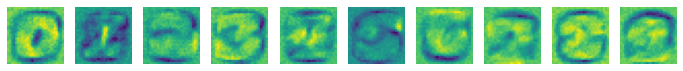

In [13]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                  # get the weights landing to neuron i
    im = im.reshape(28,28)
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)

### Shuffling the pixels

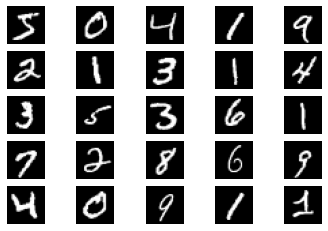

In [14]:
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
show_imgs(X_train)

In [15]:
for i in range(X_train.shape[0]):
    np.random.seed(123)
    np.random.shuffle(X_train[i])
for i in range(X_test.shape[0]):
    np.random.seed(123)
    np.random.shuffle(X_test[i])

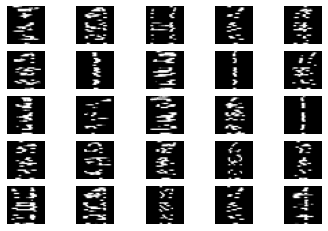

In [16]:
show_imgs(X_train)

In [17]:
# MLP: Input data should be 'flattened'. Alternatively we could use a layer for that
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Normalize input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [18]:
n_classes = 10
# Conversion to class vectors
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [20]:
E = 5                # number of epochs
B = 128              # batch size
D = X_train.shape[1] # dimension of input sample - 784 for MNIST
print(D)
model_shuffled = keras.models.Sequential()

# one layer network
model_shuffled.add(keras.layers.Dense(n_classes, input_shape=(D,), activation='softmax'))
model_shuffled.summary()

784
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])
log = model.fit(X_train, 
                Y_train, 
                batch_size=B, 
                epochs=E,
                verbose=1, 
                validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 1.4449 - accuracy: 0.6533 - val_loss: 0.4262 - val_accuracy: 0.8790
Epoch 2/5
469/469 [==============================] - 0s 989us/step - loss: 0.3793 - accuracy: 0.8913 - val_loss: 0.3345 - val_accuracy: 0.9056
Epoch 3/5
469/469 [==============================] - 0s 964us/step - loss: 0.3260 - accuracy: 0.9073 - val_loss: 0.3084 - val_accuracy: 0.9144
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.3050 - accuracy: 0.9141 - val_loss: 0.2961 - val_accuracy: 0.9186
Epoch 5/5
469/469 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.9180 - val_loss: 0.2924 - val_accuracy: 0.9204


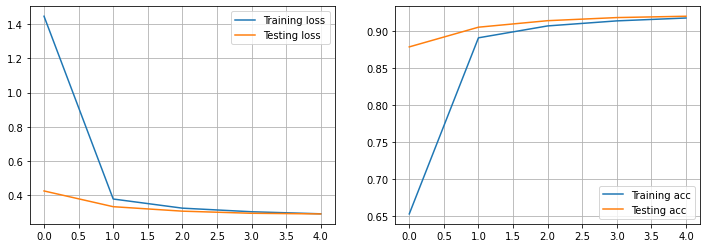

In [22]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()